<a href="https://colab.research.google.com/github/A01795331/estefania/blob/main/Actividad8RLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   NOMBRE: ESTEFANIA AMAYA ROJAS
*   MATRÍCULA: ----------------------------------------------------

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 8/Actividad8_RLineal"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

NameError: ignored

# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [ ]:
print(insurance_df.describe(include='all'))


                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    

1b) Búsqueda de valores faltantes.

In [ ]:
# Valores nulos en el DataFrame
missing_values = insurance_df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)
if missing_values.sum() == 0:
    print("No se encontraron valores faltantes en el DataFrame.")
else:
    print("Se encontraron valores faltantes en el DataFrame.")



Valores faltantes por columna:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
No se encontraron valores faltantes en el DataFrame.


1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

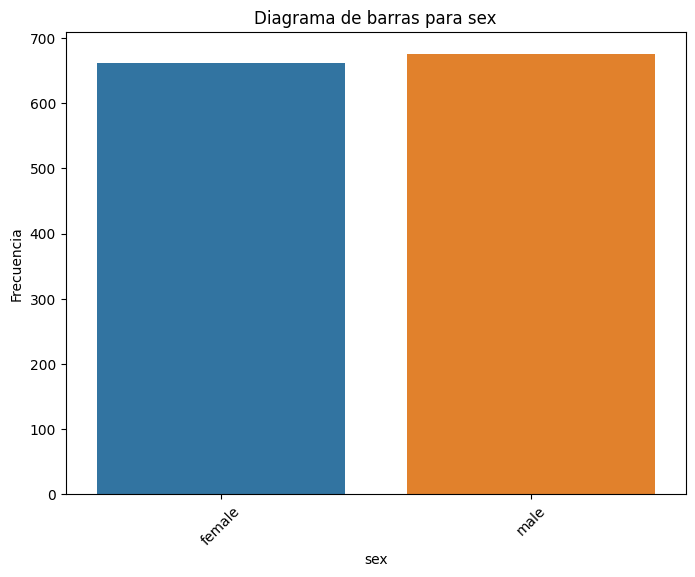

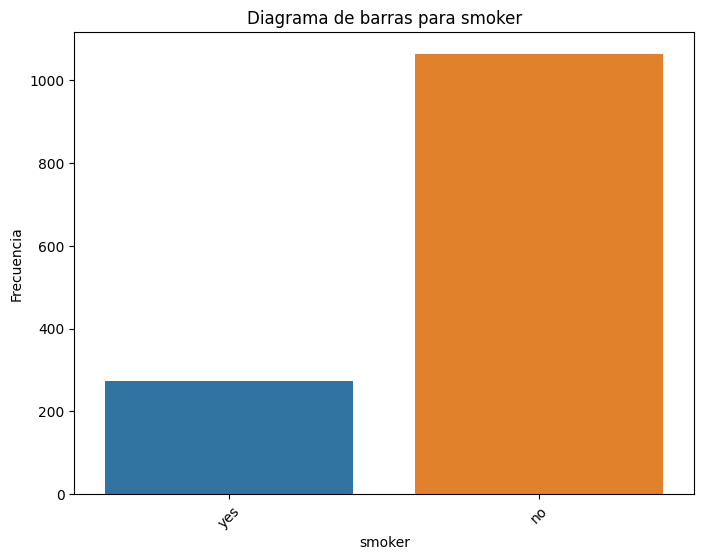

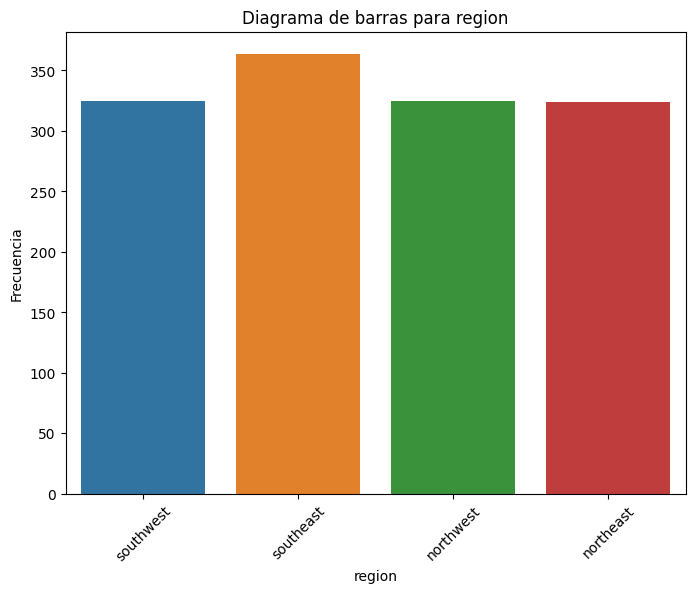

In [ ]:
# histograma para variables categóricas
categorical_columns = insurance_df.select_dtypes(include=['object'])
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=insurance_df, x=column)
    plt.title(f'Diagrama de barras para {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
    plt.show()


Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

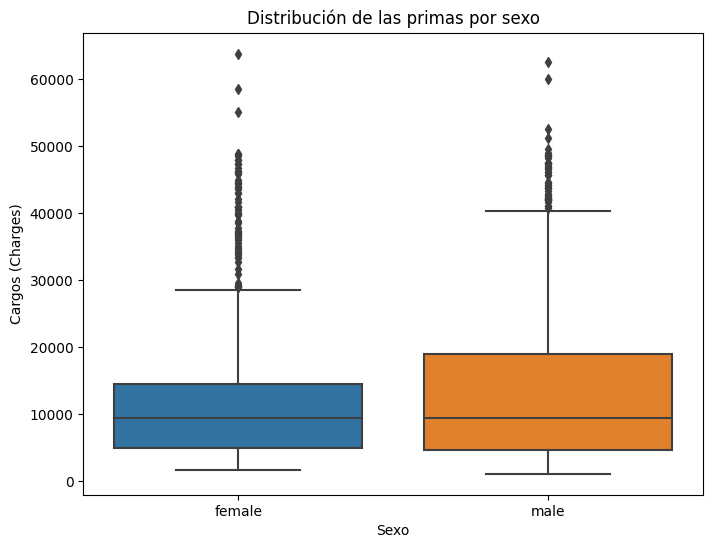

In [ ]:
# Generar un boxplot comparando las primas (charges) por sexo
plt.figure(figsize=(8, 6))
sns.boxplot(data=insurance_df, x='sex', y='charges')
plt.title('Distribución de las primas por sexo')
plt.xlabel('Sexo')
plt.ylabel('Cargos (Charges)')
plt.show()


***** si hay diferencias notables en la distribución de las primas entre hombres y mujeres. Si las medianas, los cuartiles y los valores atípicos varían mucho entre los dos sexos.

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

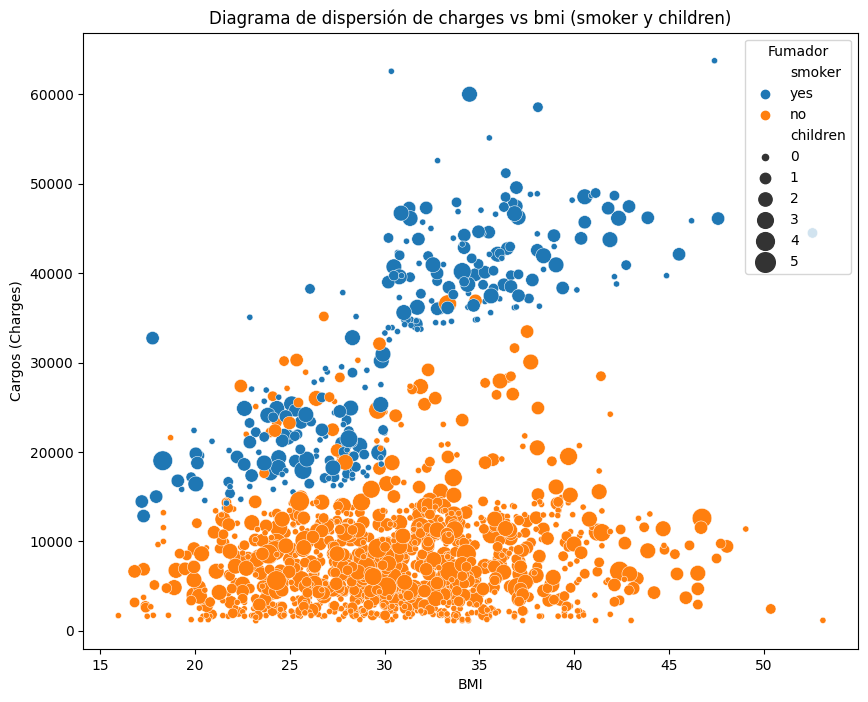

In [ ]:
# Crear un diagrama de dispersión con distintos tamaños para la variable 'children' y colores por 'smoker'
plt.figure(figsize=(10, 8))
sns.scatterplot(data=insurance_df, x='bmi', y='charges', hue='smoker', size='children', sizes=(20, 200))
plt.title('Diagrama de dispersión de charges vs bmi (smoker y children)')
plt.xlabel('BMI')
plt.ylabel('Cargos (Charges)')
plt.legend(title='Fumador', loc='upper right')
plt.show()

Los fumadores (puntos marcados en un color diferente en el gráfico) tienden a tener cargos más altos en comparación con los no fumadores, independientemente del índice de masa corporal. Los puntos de color distinto (que representan a los fumadores) están más dispersos en la parte superior del gráfico, lo que indica cargos más altos, en su mayoría.
Entre  más hijos tienden a tener cargos más bajos en comparación con los que tienen menos o ningún hijo, especialmente entre los no fumadores.


2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

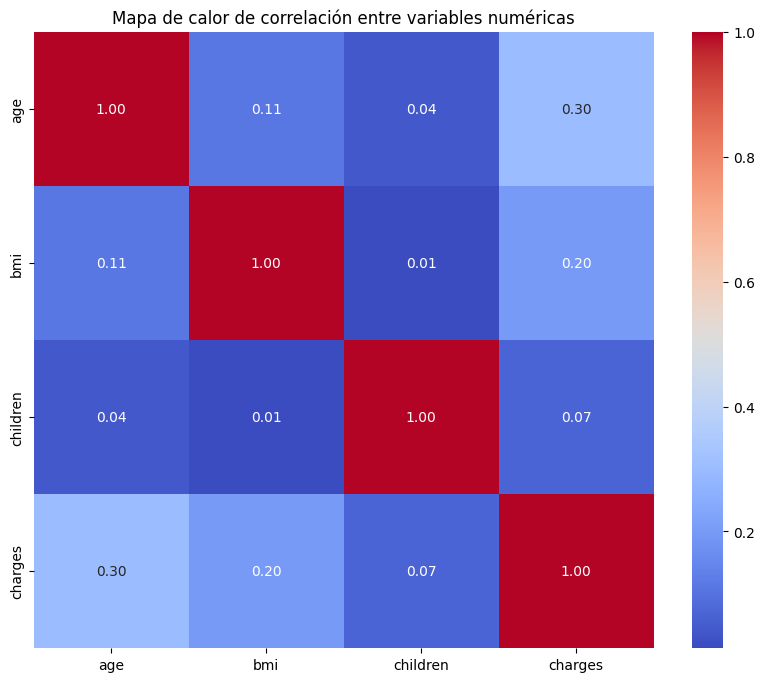

In [ ]:
# Seleccionar solo las columnas numéricas para el cálculo de correlación
numeric_columns = insurance_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

# mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlación entre variables numéricas')
plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi`?

In [ ]:
# Rango de cuartiles (IQR) de charges
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR

# valores atípicos en charges
outliers_df = insurance_df[(insurance_df['charges'] < (Q1 - outlier_threshold)) | (insurance_df['charges'] > (Q3 + outlier_threshold))]
print("Observaciones con valores atípicos en 'charges':")
print(outliers_df)

# Promedio de 'age' y 'bmi'
average_age = insurance_df['age'].mean()
print(f"\nPromedio de 'age': {average_age}")
average_bmi = insurance_df['bmi'].mean()
print(f"Promedio de 'bmi': {average_bmi}")


Observaciones con valores atípicos en 'charges':
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]

Promedio de 'age': 39.20702541106129
Promedio de 'bmi': 30.66339686098655


3b) ¿Qué porcentaje de estas observaciones se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

In [ ]:
# Porcentaje de observaciones atípicas por género (sex)
total_outliers = len(outliers_df)
percentage_female = (outliers_df[outliers_df['sex'] == 'female'].shape[0] / total_outliers) * 100
percentage_male = (outliers_df[outliers_df['sex'] == 'male'].shape[0] / total_outliers) * 100
print(f"Porcentaje de observaciones atípicas correspondientes a mujeres: {percentage_female:.2f}%")
print(f"Porcentaje de observaciones atípicas correspondientes a hombres: {percentage_male:.2f}%")

# Porcentaje de observaciones atípicas por hábito de fumar (smoker)
percentage_smoker = (outliers_df[outliers_df['smoker'] == 'yes'].shape[0] / total_outliers) * 100
percentage_non_smoker = (outliers_df[outliers_df['smoker'] == 'no'].shape[0] / total_outliers) * 100
print(f"Porcentaje de observaciones atípicas correspondientes a fumadores: {percentage_smoker:.2f}%")
print(f"Porcentaje de observaciones atípicas correspondientes a no fumadores: {percentage_non_smoker:.2f}%")


Porcentaje de observaciones atípicas correspondientes a mujeres: 35.97%
Porcentaje de observaciones atípicas correspondientes a hombres: 64.03%
Porcentaje de observaciones atípicas correspondientes a fumadores: 97.84%
Porcentaje de observaciones atípicas correspondientes a no fumadores: 2.16%


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [ ]:
# Separar las variables predictoras de la variable de salida
X = insurance_df.drop('charges', axis=1)  # Aquí se obtienen todas las columnas excepto 'charges' como variables predictoras
print("Variables predictoras (X):")
print(X.head())

y = insurance_df['charges']  # Se asigna la columna 'charges' como variable de salida
print("\nVariable de salida (y):")
print(y.head())

Variables predictoras (X):
   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest

Variable de salida (y):
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

Forma de X_train: (1070, 6)
Forma de X_test: (268, 6)
Forma de y_train: (1070,)
Forma de y_test: (268,)


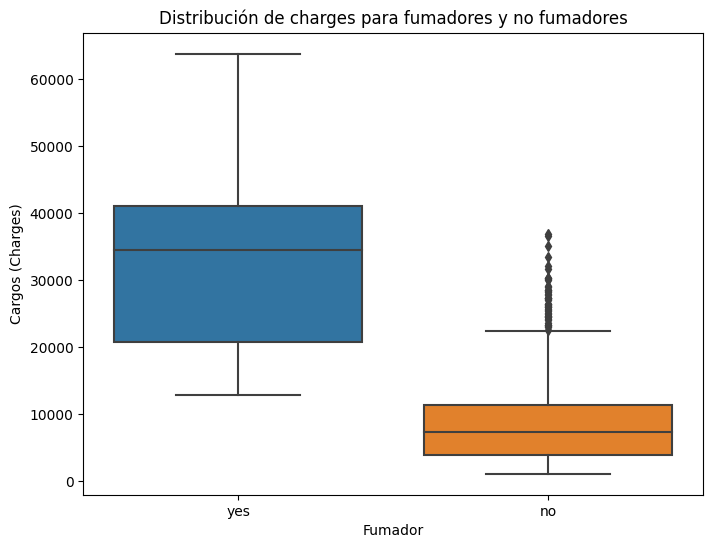

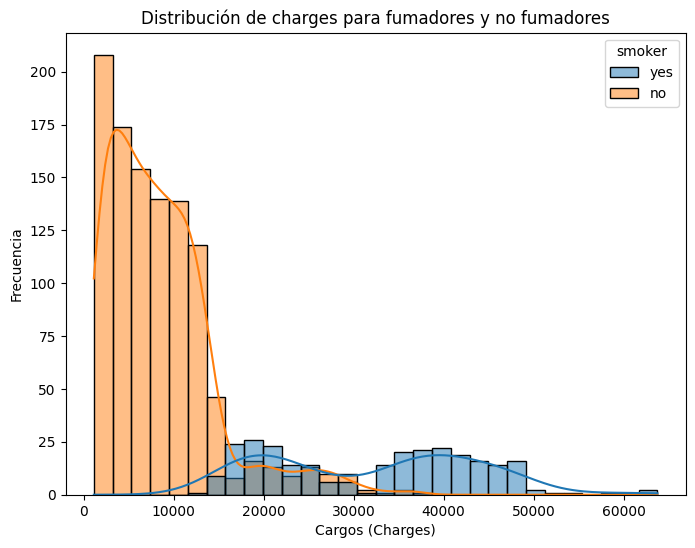

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Imprimir formas de los conjuntos de entrenamiento y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

# Diagrama de 'charges' para fumadores y no fumadores
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=insurance_df)
plt.title('Distribución de charges para fumadores y no fumadores')
plt.xlabel('Fumador')
plt.ylabel('Cargos (Charges)')
plt.show()

# Histogramas para 'charges' separados por la condición de fumar
plt.figure(figsize=(8, 6))
sns.histplot(insurance_df, x='charges', hue='smoker', kde=True)
plt.title('Distribución de charges para fumadores y no fumadores')
plt.xlabel('Cargos (Charges)')
plt.ylabel('Frecuencia')
plt.show()

La proporción de fumadores y no fumadores es significativamente diferente en el conjunto de datos, estratificar según esta variable podría garantizar que las dos submuestras (entrenamiento y prueba) mantengan una proporción similar de fumadores y no fumadores, lo que podría ser importante si esta variable tiene un impacto significativo en la variable objetivo ('charges').
Para validar si es conveniente usar 'smoker' en la estrategia de estratificación


6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Identificar las columnas numéricas y categóricas
numeric_features = insurance_df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = insurance_df.select_dtypes(include=['object']).columns

# Definir las transformaciones para variables numéricas y categóricas
numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(sparse=False)

# Combinar las transformaciones en un preprocesamiento general
preprocessing = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Suponiendo que tienes cargado tu conjunto de datos insurance_df

# Separar las variables predictoras de la variable de salida
X = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Definir transformador para datos numéricos y categóricos
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(sparse=False)

preprocessing = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Crear el pipeline con el preprocesamiento y el modelo de regresión lineal
lr_model = Pipeline(steps=[('preprocessing', preprocessing), ('regression', LinearRegression())])

# Entrenar el modelo de regresión lineal
lr_model.fit(X_train, y_train)

# Predecir con el modelo en el conjunto de prueba
y_pred = lr_model.predict(X_test)

# Calcular el RMSE (raíz del error cuadrático medio)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcular la métrica R cuadrado (R2)
r2 = r2_score(y_test, y_pred)
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")
print(f"Métrica R cuadrado (R2): {r2}")


Raíz del Error Cuadrático Medio (RMSE): 5962.143300866846
Métrica R cuadrado (R2): 0.7618770067377642


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [ ]:
from copy import deepcopy

# Definir una copia del conjunto de datos para evitar cambios en el original
X_train_copy = deepcopy(X_train)
X_test_copy = deepcopy(X_test)
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

# Calcular el rango intercuartílico (IQR) de 'charges' en el conjunto de entrenamiento
Q1 = y_train_copy.quantile(0.25)
Q3 = y_train_copy.quantile(0.75)
IQR = Q3 - Q1

# Calcular el límite superior para los outliers
upper_limit = Q3 + 1.5 * IQR

# Reemplazar outliers en 'charges' con el límite superior en ambos conjuntos
y_train_copy[y_train_copy > upper_limit] = upper_limit
y_test_copy[y_test_copy > upper_limit] = upper_limit

# Crear un nuevo pipeline con el preprocesamiento y el modelo de regresión lineal
lr_model2 = Pipeline(steps=[('preprocessing', preprocessing), ('regression', LinearRegression())])

# Entrenar el modelo de regresión lineal con los conjuntos modificados
lr_model2.fit(X_train_copy, y_train_copy)

# Predecir con el nuevo modelo en el conjunto de prueba modificado
y_pred2 = lr_model2.predict(X_test_copy)

# Calcular el RMSE y R2 con los conjuntos modificados
rmse2 = mean_squared_error(y_test_copy, y_pred2, squared=False)
r2_2 = r2_score(y_test_copy, y_pred2)
print(f"Raíz del Error Cuadrático Medio (RMSE) con outliers reemplazados: {rmse2}")
print(f"Métrica R cuadrado (R2) con outliers reemplazados: {r2_2}")


Raíz del Error Cuadrático Medio (RMSE) con outliers reemplazados: 4903.365738190548
Métrica R cuadrado (R2) con outliers reemplazados: 0.7609156516720228


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline

# Reemplazar outliers en 'charges' con el límite superior en ambos conjuntos
upper_limit = Q3 + 1.5 * IQR
y_train_copy[y_train_copy > upper_limit] = upper_limit
y_test_copy[y_test_copy > upper_limit] = upper_limit

# Preparar el transformador para datos numéricos y categóricos
numeric_transformer2 = StandardScaler()
categorical_transformer2 = OrdinalEncoder()

# Definir transformador preprocessing2
preprocessing2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer2, numeric_features),
        ('cat', categorical_transformer2, categorical_features)
    ]
)

# Crear un nuevo pipeline con el preprocessing2 y regresión lineal
lr_model3 = Pipeline(steps=[('preprocessing', preprocessing2), ('regression', LinearRegression())])

# Entrenar el modelo de regresión lineal con el nuevo pipeline y los datos modificados
lr_model3.fit(X_train_copy, y_train_copy)

# Predecir con el nuevo modelo en el conjunto de prueba modificado
y_pred3 = lr_model3.predict(X_test_copy)

# Calcular el RMSE y R2 con el nuevo modelo
rmse3 = mean_squared_error(y_test_copy, y_pred3, squared=False)
r2_3 = r2_score(y_test_copy, y_pred3)
print(f"Raíz del Error Cuadrático Medio (RMSE) con nuevo pipeline (reemplazo de outliers y preprocessing2): {rmse3}")
print(f"Métrica R cuadrado (R2) con nuevo pipeline (reemplazo de outliers y preprocessing2): {r2_3}")


Raíz del Error Cuadrático Medio (RMSE) con nuevo pipeline (reemplazo de outliers y preprocessing2): 4897.522432690164
Métrica R cuadrado (R2) con nuevo pipeline (reemplazo de outliers y preprocessing2): 0.7614851423195637


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Suponiendo que tienes cargado tu conjunto de datos insurance_df

# Separar las variables predictoras de la variable de salida
X = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Identificar las columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Definir transformador para datos categóricos
categorical_transformer = OneHotEncoder()

# Crear pipeline para preprocesamiento categórico
categorical_pipeline = Pipeline(steps=[
    ('encoder', categorical_transformer)
])

# Aplicar preprocesamiento categórico a las variables categóricas
X_train_categorical = categorical_pipeline.fit_transform(X_train[categorical_features])
X_test_categorical = categorical_pipeline.transform(X_test[categorical_features])

# Crear transformador para regresión polinomial en las variables numéricas
numeric_transformer = PolynomialFeatures(degree=best_degree, include_bias=False)

# Transformar las variables numéricas con regresión polinomial
X_train_numeric_poly = numeric_transformer.fit_transform(X_train[numeric_features])
X_test_numeric_poly = numeric_transformer.transform(X_test[numeric_features])

# Unir las variables transformadas (tanto numéricas como categóricas)
X_train_transformed = np.concatenate([X_train_numeric_poly, X_train_categorical.toarray()], axis=1)
X_test_transformed = np.concatenate([X_test_numeric_poly, X_test_categorical.toarray()], axis=1)

# Crear un nuevo modelo de regresión lineal con regresión polinomial
lr_model4 = LinearRegression()

# Entrenar el modelo de regresión lineal con las variables transformadas
lr_model4.fit(X_train_transformed, y_train)

# Realizar predicciones con el modelo
y_pred_lr4 = lr_model4.predict(X_test_transformed)

# Calcular métricas de evaluación
rmse_lr4 = mean_squared_error(y_test, y_pred_lr4, squared=False)
r2_lr4 = r2_score(y_test, y_pred_lr4)
print(f"Raíz del Error Cuadrático Medio (RMSE) con regresión polinomial: {rmse_lr4}")
print(f"Métrica R cuadrado (R2) con regresión polinomial: {r2_lr4}")


Raíz del Error Cuadrático Medio (RMSE) con regresión polinomial: 5956.454717976426
Métrica R cuadrado (R2) con regresión polinomial: 0.7623311844057112
